In [1]:
!pip install -r requirements.txt --quiet

In [2]:
import os
import shutil

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator
from watermark import watermark

In [3]:
# !mkdir Results_4h

In [4]:
# shutil.unpack_archive("Results_4h.zip", "Results_4h/")

In [5]:
# @title
def visSets(set1: list, set2: list, csvpath: str) -> [DataFrame, DataFrame]:
    """
    Visualize sets of data from csv files in a given directory

    Parameters:
    set1 (list): List of strings indicating well names for set 1
    set2 (list): List of strings indicating well names for set 2
    csvpath (str): Path to directory containing csv files

    Returns:
    Tuple: A tuple of two pandas dataframes, containing data from well_set1 and well_set2 respectively

    """
    dir_list = os.listdir(csvpath)
    print("Files and directories in '", path, "' :")

    well_set1 = pd.DataFrame()
    well_set2 = pd.DataFrame()

    # read csv of set 1
    for well in set1:
        for csv in dir_list:
            if csv.find(well, 0, 3) > -1:
                csv_set = pd.read_csv(csvpath + csv, sep=",")
                csv_set["Well"] = well
                well_set1 = pd.concat([well_set1, csv_set])

    # read csv of set 2
    for well in set2:
        for csv in dir_list:
            if csv.find(well, 0, 3) > -1:
                csv_set = pd.read_csv(csvpath + csv, sep=",")
                csv_set["Well"] = well
                well_set2 = pd.concat([well_set2, csv_set])

    return well_set1, well_set2

In [6]:
# @title
def pltoSet1(B23: DataFrame):
    """
    This function creates a box plot using the Seaborn library. It takes a pandas DataFrame as input
    and visualizes the distribution of "Mean" values for different "Well" categories.
    The plot is created with a logarithmic x axis, horizontal boxes and grid lines for the x axis.
    The y axis is labeled with "Mean".

    Parameters:
    B23 (pd.DataFrame): A pandas DataFrame with columns "Well" and "Mean".

    Returns:
    None
    """
    sns.set_theme(style="ticks")

    # Initialize the figure 
    f, ax = plt.subplots(figsize=(7, 6))

    # Plot 
    sns.boxplot(
        x="Well",
        y="Mean",
        data=B23,
        width=0.6,
        palette="vlag",
        showfliers=False,
    )

    # Tweak the visual presentation
    ax.xaxis.grid(True)
    ax.set(ylabel="Mean")
    sns.despine(trim=True, left=True)

In [7]:
# @title
def norm_test(data: list, name: str):
    """
    Performs a normality test on a given data sample and returns a conclusion on whether the data is from a normal distribution.

    Inputs:
    data (list): A list of numerical values representing the data sample
    name (str): A string that represents the name of the data sample

    Outputs:
    None

    Side effects:
    Prints the p-value and the conclusion of the normality test on the data sample.

    Example:
    >>> norm_test([1, 2, 3, 4, 5], "Sample Data")
    p = 0.157298
    null hypothesis: Sample Data comes from a normal distribution
    The null hypothesis cannot be rejected
    """
    k2, p = normaltest(data)
    alpha = 1e-3
    print("p = {:g}".format(p))
    print("null hypothesis: {} comes from a normal distribution".format(name))
    if p < alpha:  # null hypothesis: Data from a normal distribution
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")
    print("")

In [8]:
# @title
def visStats(set1: list, set2: list, path: str, stat_text: str, fig_name: str):
    """
    visStats(set1: list, set2: list, path: str, stat_text: str, fig_name: str):

    This function generates visualization of statistics between two sets of data and saves the figure to current path.

    set1: list
    A list of strings containing the name of each well in the first set.
    set2: list
    A list of strings containing the name of each well in the second set.
    path: str
    The path to the directory where the figure will be saved.
    stat_text: str
    The text to be added to the plot as a title or subtitle.
    fig_name: str
    The name of the figure file to be saved.

    Returns: None
    """

    well_set1, well_set2 = visSets(set1, set2, path)
    well_set1["Set"] = 1
    well_set1["Well"].describe()

    well_set2["Set"] = 2
    well_set2["Well"].describe()

    pltoSet1(well_set1)
    pltoSet1(well_set2)

    print("Statistics:")
    print("")

    csv_all = pd.concat([well_set1, well_set2])

    sns.set_theme(style="ticks")

    # Initialize the figure 
    f, ax = plt.subplots(figsize=(7, 6))

    # Plot 
    sns.boxplot(
        x="Well",
        y="Mean",
        data=csv_all,
        width=0.6,
        hue="Set",
        palette=["m", "g"],
    )

    # Add in points to show each observation
    ax.set(ylabel="Mean")
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    # sns.despine(trim=True, left=True)

    for well in set1:
        norm_test(csv_all[csv_all["Well"] == well].Mean, well)

    for well in set2:
        norm_test(csv_all[csv_all["Well"] == well].Mean, well)

    # pvalues with scipy:
    stat_results = [
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[0]].Mean,
            csv_all[csv_all["Well"] == set2[0]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[0]].Mean,
            csv_all[csv_all["Well"] == set2[1]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[0]].Mean,
            csv_all[csv_all["Well"] == set2[2]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[1]].Mean,
            csv_all[csv_all["Well"] == set2[0]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[1]].Mean,
            csv_all[csv_all["Well"] == set2[1]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[1]].Mean,
            csv_all[csv_all["Well"] == set2[2]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[2]].Mean,
            csv_all[csv_all["Well"] == set2[0]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[2]].Mean,
            csv_all[csv_all["Well"] == set2[1]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[2]].Mean,
            csv_all[csv_all["Well"] == set2[2]].Mean,
            alternative="two-sided",
        ),
    ]

    pvalues = [result.pvalue for result in stat_results]
    print(pvalues)

    pairs = [
        (set1[0], set2[0]),
        (set1[0], set2[1]),
        (set1[0], set2[2]),
        (set1[1], set2[0]),
        (set1[1], set2[1]),
        (set1[1], set2[2]),
        (set1[2], set2[0]),
        (set1[2], set2[1]),
        (set1[2], set2[2]),
    ]

    formatted_pvalues = [f"p={p:.2e}" for p in pvalues]

    for p in pvalues:
        print(p)

    # prepare plots
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)
    states_palette = sns.color_palette("YlGnBu", n_colors=5)

    cmap = sns.color_palette("colorblind")
    plotting_parameters = {
        "data": csv_all,
        "x": "Well",
        "y": "Mean",
        "showfliers": False,
        "width": 0.6,
        #'hue':"Set",
        "palette": [cmap[0], cmap[1], cmap[4], cmap[0], cmap[1], cmap[4]],
    }

    # show results
    with sns.plotting_context("notebook", font_scale=1.4):
        # Create new plot
        fig, ax = plt.subplots(1, 1, figsize=(12, 6))

        # Plot with seaborn
        sns.boxplot(**plotting_parameters)

        # Add annotations
        annotator = Annotator(ax, pairs, **plotting_parameters)
        ## p values
        # annotator.set_custom_annotations(formatted_pvalues)
        # annotator.annotate()

        ## <> p values
        annotator.configure(text_format="simple")
        annotator.set_pvalues(pvalues).annotate()

        # Label and show
        plt.title(stat_text, y=1.06)

        plt.savefig("./" + fig_name + ".png", bbox_inches="tight")
        plt.show()

In [9]:
path = "Results_4h_final/"

dir_list = os.listdir(path)
print("Files and directories in '", path, "' :")
# prints all files
print(dir_list)

Files and directories in ' Results_4h_final/ ' :
['B2_AllResults_2023-2-20_Results.csv', 'B3_AllResults_2023-2-20_Results.csv', 'B4_AllResults_2023-2-20_Results.csv', 'B6_AllResults_2023-2-20_Results.csv', 'B7_AllResults_2023-2-20_Results.csv', 'B8_AllResults_2023-2-20_Results.csv', 'C2_AllResults_2023-2-20_Results.csv', 'C3_AllResults_2023-2-20_Results.csv', 'C4_AllResults_2023-2-20_Results.csv', 'C6_AllResults_2023-2-20_Results.csv', 'C7_AllResults_2023-2-20_Results.csv', 'C8_AllResults_2023-2-20_Results.csv', 'D2_AllResults_2023-2-20_Results.csv', 'D3_AllResults_2023-2-20_Results.csv', 'D4_AllResults_2023-2-20_Results.csv', 'D6_AllResults_2023-2-20_Results.csv', 'D7_AllResults_2023-2-20_Results.csv', 'D8_AllResults_2023-2-20_Results.csv']


In [10]:
# create an Empty DataFrame object
df = pd.DataFrame()

# append columns to an empty DataFrame
df["Set"] = []
df["Mean"] = []
df["Mean_25"] = []
df["Mean_75"] = []
df["Median"] = []
df["Median_25"] = []
df["Median_75"] = []
df["Area"] = []
df["Area_25"] = []
df["Area_75"] = []
df["MoA"] = []

print(df)

Empty DataFrame
Columns: [Set, Mean, Mean_25, Mean_75, Median, Median_25, Median_75, Area, Area_25, Area_75, MoA]
Index: []


0
Files and directories in ' Results_4h_final/ ' :
Control
stats
Files and directories in ' Results_4h_final/ ' :
Mean Brigthnes
Set1
1.6410656815944882
Set2
2.1790608407687024
Mean Area
Set1
0.05252235974409449
Set2
0.035090470144131775


C:\Users\mspat\AppData\Local\Temp\ipykernel_25976\1142889798.py:104: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mspat\AppData\Local\Temp\ipykernel_25976\1142889798.py:119: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


--Mean/Area--
Set1
31.245086656240847
Set2
62.09836550545931
Fold: 1.9874601785767771
Files and directories in ' Results_4h_final/ ' :
Statistics:

p = 4.84464e-220
null hypothesis: B4 comes from a normal distribution
The null hypothesis can be rejected

p = 7.61344e-309
null hypothesis: C4 comes from a normal distribution
The null hypothesis can be rejected

p = 5.0725e-200
null hypothesis: D4 comes from a normal distribution
The null hypothesis can be rejected

p = 7.44099e-201
null hypothesis: B2 comes from a normal distribution
The null hypothesis can be rejected

p = 5.48042e-186
null hypothesis: C2 comes from a normal distribution
The null hypothesis can be rejected

p = 2.57152e-179
null hypothesis: D2 comes from a normal distribution
The null hypothesis can be rejected

[0.3873446574790814, 0.7495995295693938, 0.11822625409922873, 0.3188939172259839, 0.7782728188266449, 0.11407696065837429, 0.0009225263169033387, 7.581139718596385e-06, 5.885044087714544e-09]
0.3873446574790814


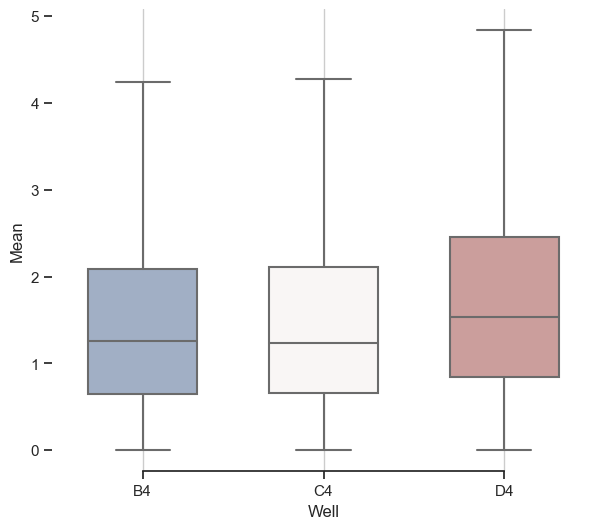

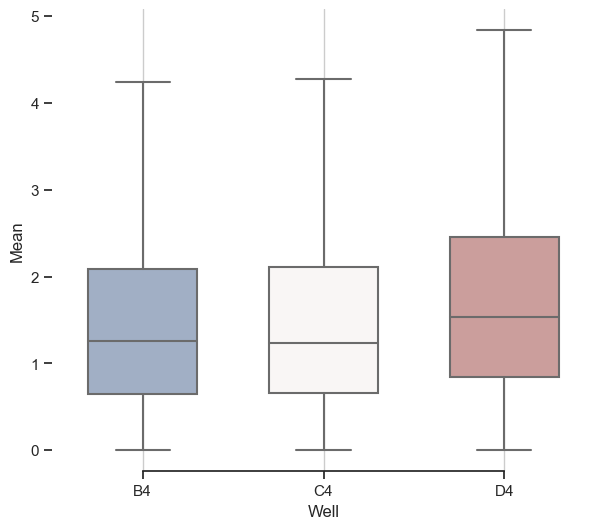

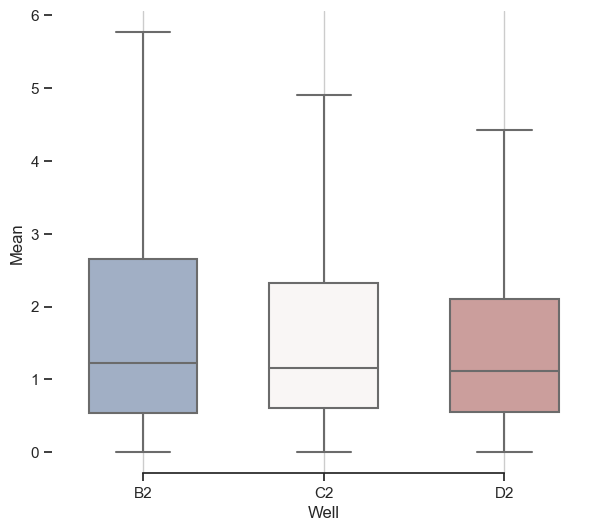

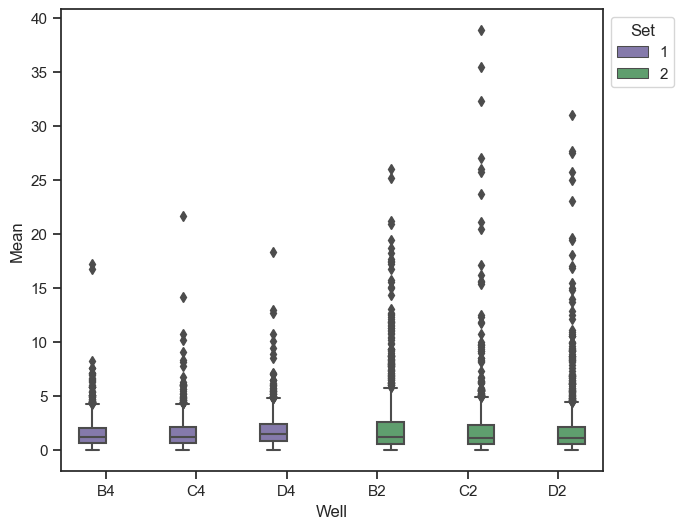

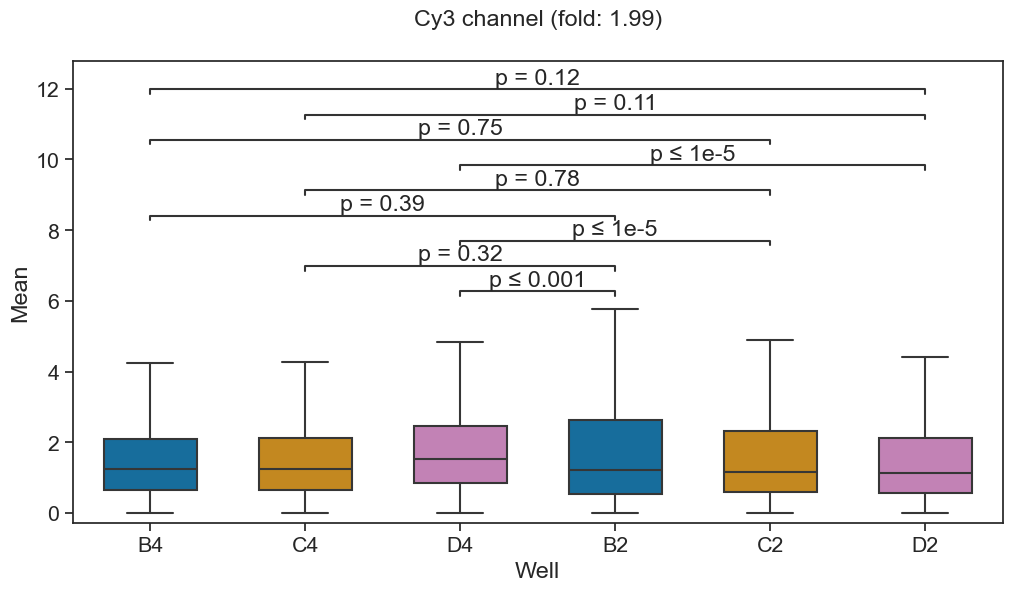

1
Files and directories in ' Results_4h_final/ ' :
Control
stats
Files and directories in ' Results_4h_final/ ' :
Mean Brigthnes
Set1
1.6410656815944882
Set2
2.151435221527589
Mean Area
Set1
0.05252235974409449
Set2
0.03979923892362055
--Mean/Area--
Set1
31.245086656240847
Set2
54.05719505482122
Fold: 1.7301022605429042
Files and directories in ' Results_4h_final/ ' :


C:\Users\mspat\AppData\Local\Temp\ipykernel_25976\1142889798.py:104: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mspat\AppData\Local\Temp\ipykernel_25976\1142889798.py:119: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Statistics:

p = 4.84464e-220
null hypothesis: B4 comes from a normal distribution
The null hypothesis can be rejected

p = 7.61344e-309
null hypothesis: C4 comes from a normal distribution
The null hypothesis can be rejected

p = 5.0725e-200
null hypothesis: D4 comes from a normal distribution
The null hypothesis can be rejected

p = 2.73598e-229
null hypothesis: B3 comes from a normal distribution
The null hypothesis can be rejected

p = 2.51484e-301
null hypothesis: C3 comes from a normal distribution
The null hypothesis can be rejected

p = 2.9137e-206
null hypothesis: D3 comes from a normal distribution
The null hypothesis can be rejected

[0.016940623876601182, 0.035868013555971995, 0.11740090978795031, 0.011741524626999027, 0.02686377796933764, 0.10391295697608811, 0.0033235833985073254, 1.0155814566979088e-13, 2.3244955177181027e-11]
0.016940623876601182
0.035868013555971995
0.11740090978795031
0.011741524626999027
0.02686377796933764
0.10391295697608811
0.0033235833985073254
1

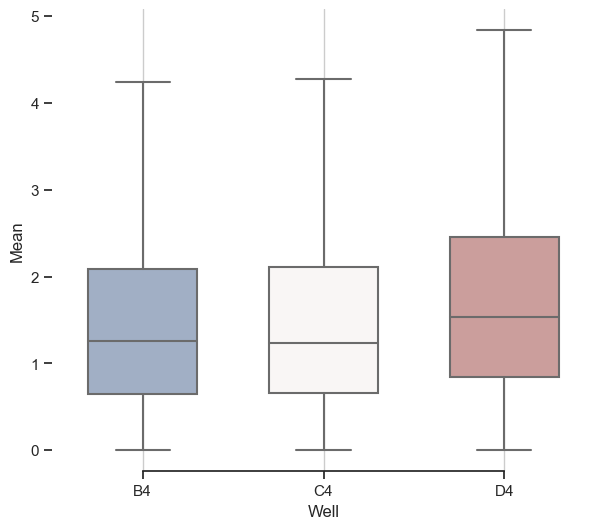

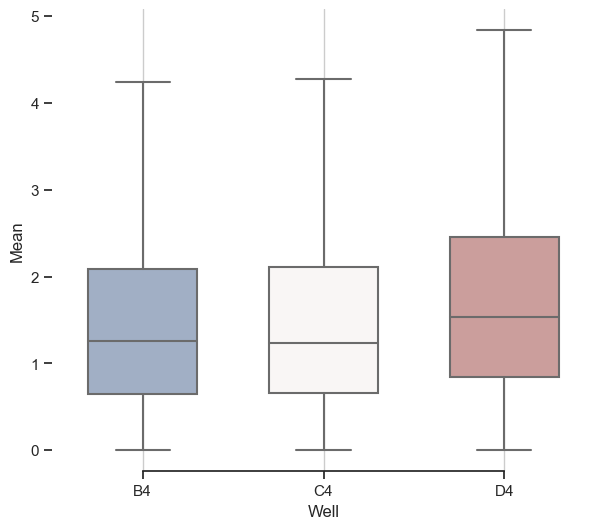

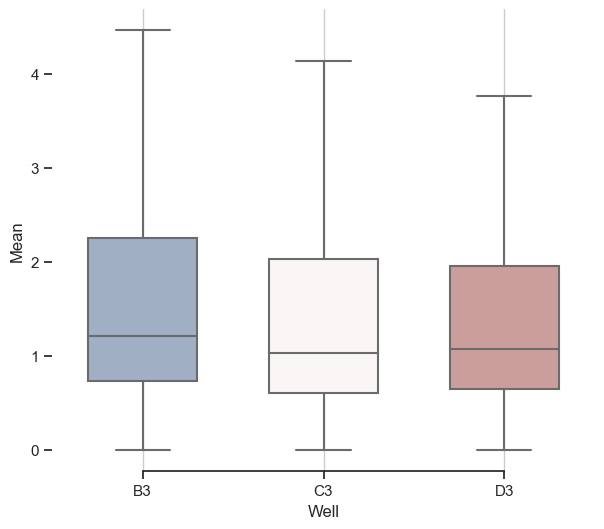

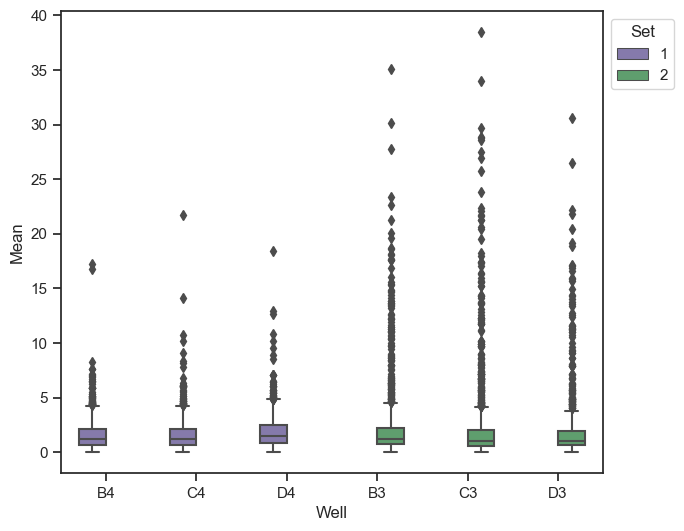

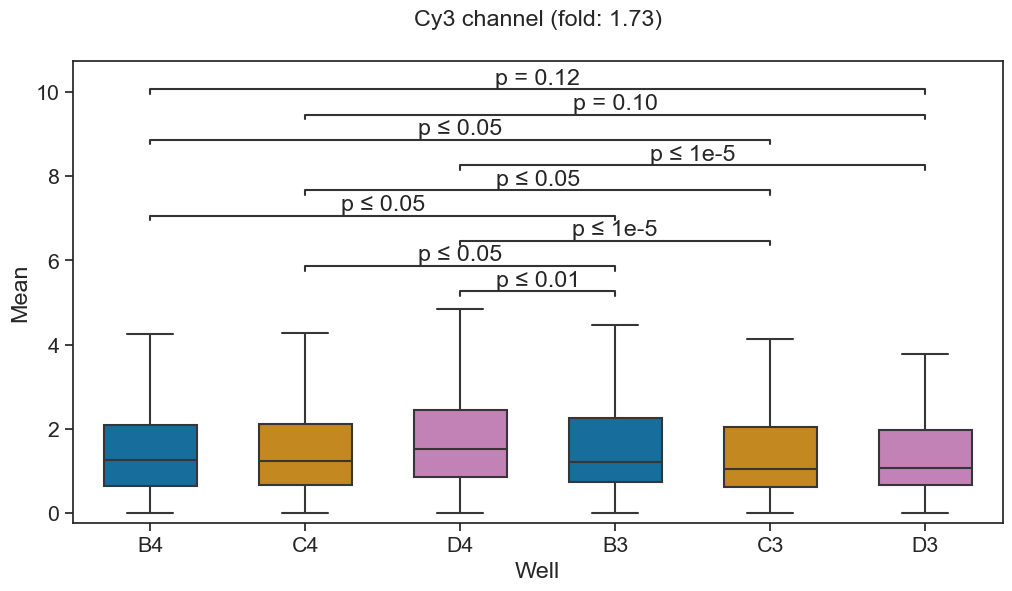

2
Files and directories in ' Results_4h_final/ ' :
Control
stats
Files and directories in ' Results_4h_final/ ' :
Mean Brigthnes
Set1
0.1316777059235892
Set2
0.12733804083769631
Mean Area
Set1
0.08010618997546443
Set2
0.07284471937172776
--Mean/Area--
Set1
1.6437893995947195
Set2
1.748075110124157
Fold: 1.0634422576001217
Files and directories in ' Results_4h_final/ ' :


C:\Users\mspat\AppData\Local\Temp\ipykernel_25976\1142889798.py:104: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mspat\AppData\Local\Temp\ipykernel_25976\1142889798.py:119: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Statistics:

p = 0
null hypothesis: B8 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: C8 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: D8 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: B6 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: C6 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: D6 comes from a normal distribution
The null hypothesis can be rejected

[0.37264246696612613, 5.893560685587316e-09, 1.3653020479096703e-07, 0.45901205744418894, 1.113224812801036e-09, 3.557904397787811e-08, 0.9394139640240059, 1.9040194699047838e-06, 1.9897389034916524e-05]
0.37264246696612613
5.893560685587316e-09
1.3653020479096703e-07
0.45901205744418894
1.113224812801036e-09
3.557904397787811e-08
0.9394139640240059
1.9040194699047838e-06
1.9897389034916524e-05
D8 vs. B6: Cu

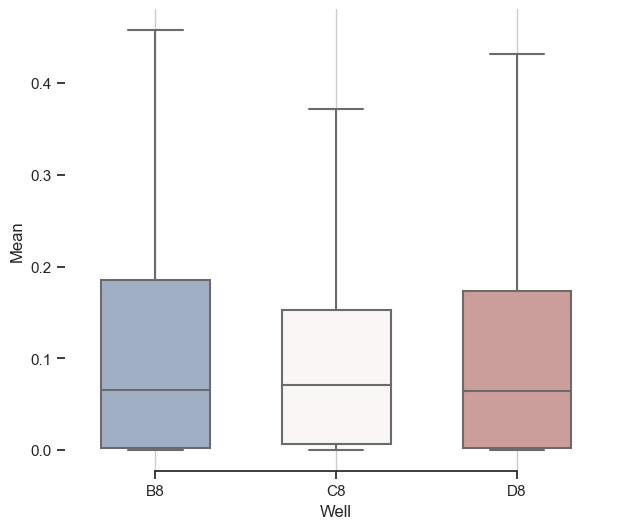

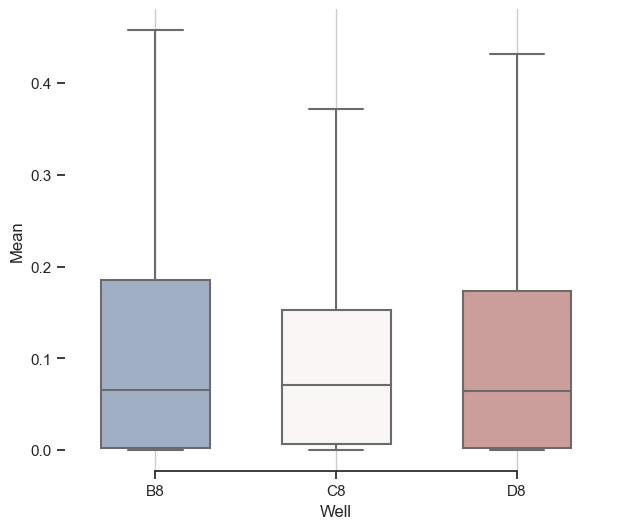

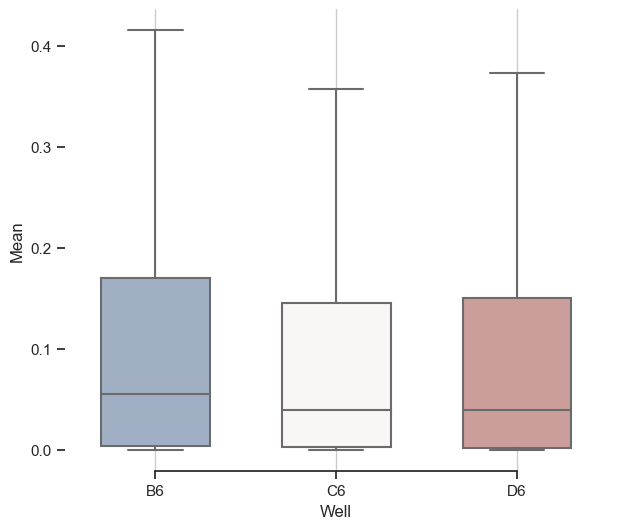

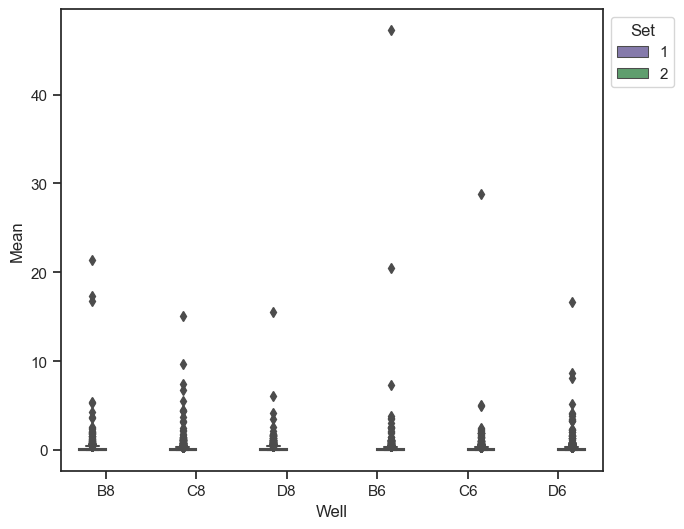

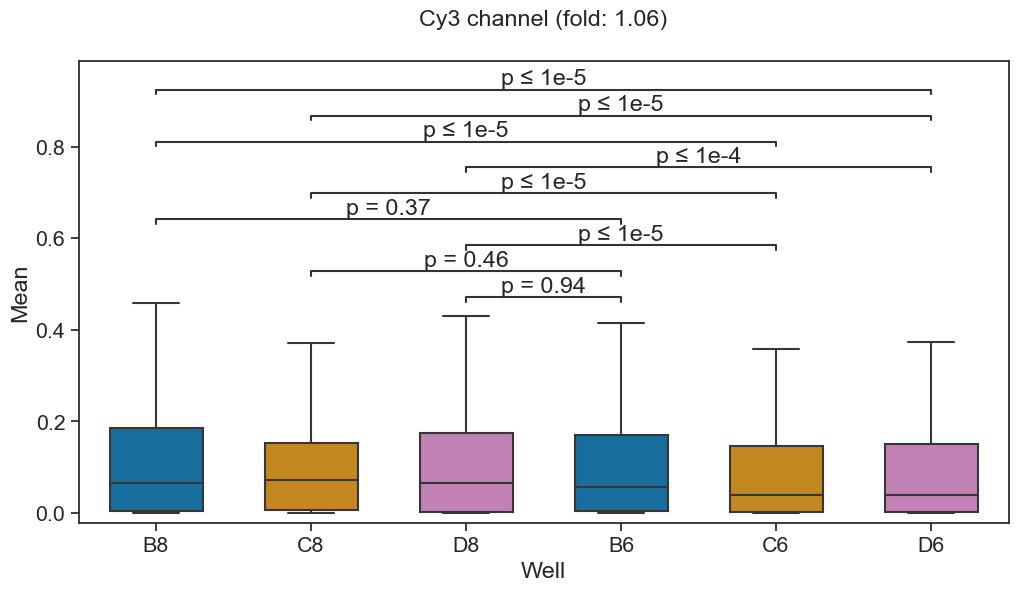

3
Files and directories in ' Results_4h_final/ ' :
Control
stats
Files and directories in ' Results_4h_final/ ' :
Mean Brigthnes
Set1
0.1316777059235892
Set2
0.11906337727558067
Mean Area
Set1
0.08010618997546443
Set2
0.0749447562251517
--Mean/Area--
Set1
1.6437893995947195
Set2
1.5886818941392808
Fold: 0.966475324960104
Files and directories in ' Results_4h_final/ ' :


C:\Users\mspat\AppData\Local\Temp\ipykernel_25976\1142889798.py:104: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mspat\AppData\Local\Temp\ipykernel_25976\1142889798.py:119: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Statistics:

p = 0
null hypothesis: B8 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: C8 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: D8 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: B7 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: C7 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: D7 comes from a normal distribution
The null hypothesis can be rejected

[0.4872823651270417, 2.400303903116725e-11, 1.9950938013603096e-13, 0.7240614658282971, 1.7569415848612612e-12, 9.751048456769327e-15, 0.6994448004658484, 1.6872287561269904e-08, 2.2174231404175042e-10]
0.4872823651270417
2.400303903116725e-11
1.9950938013603096e-13
0.7240614658282971
1.7569415848612612e-12
9.751048456769327e-15
0.6994448004658484
1.6872287561269904e-08
2.2174231404175042e-10
D8 vs. B7: Cust

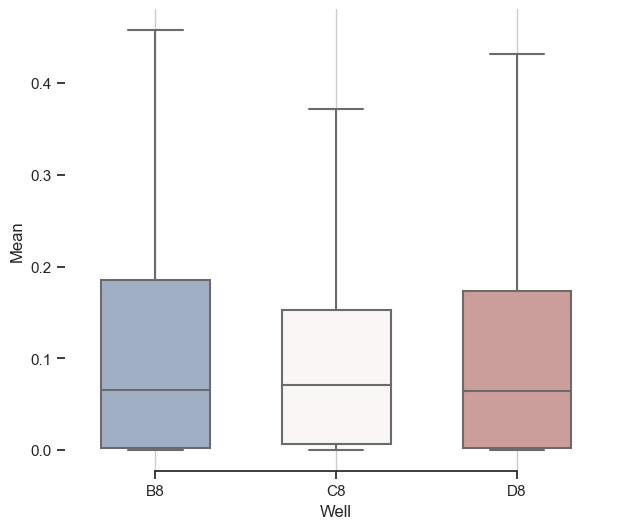

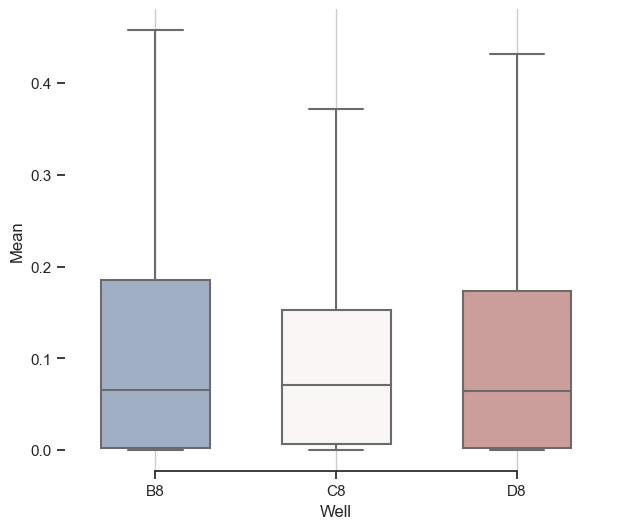

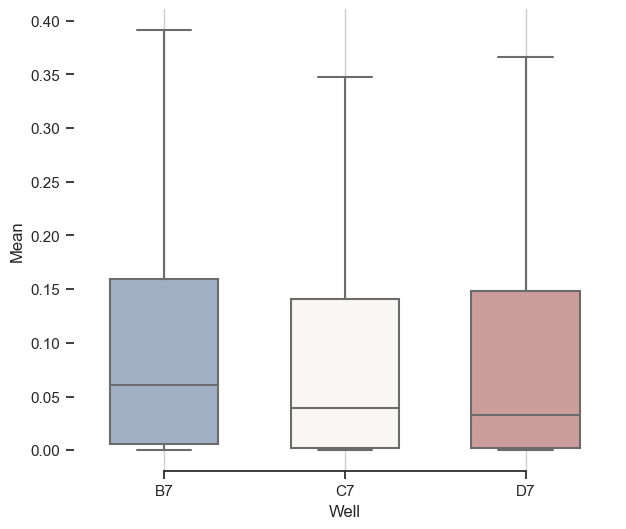

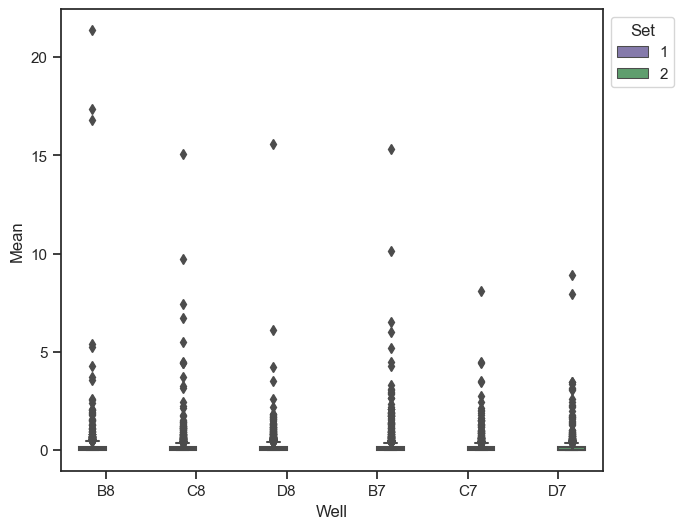

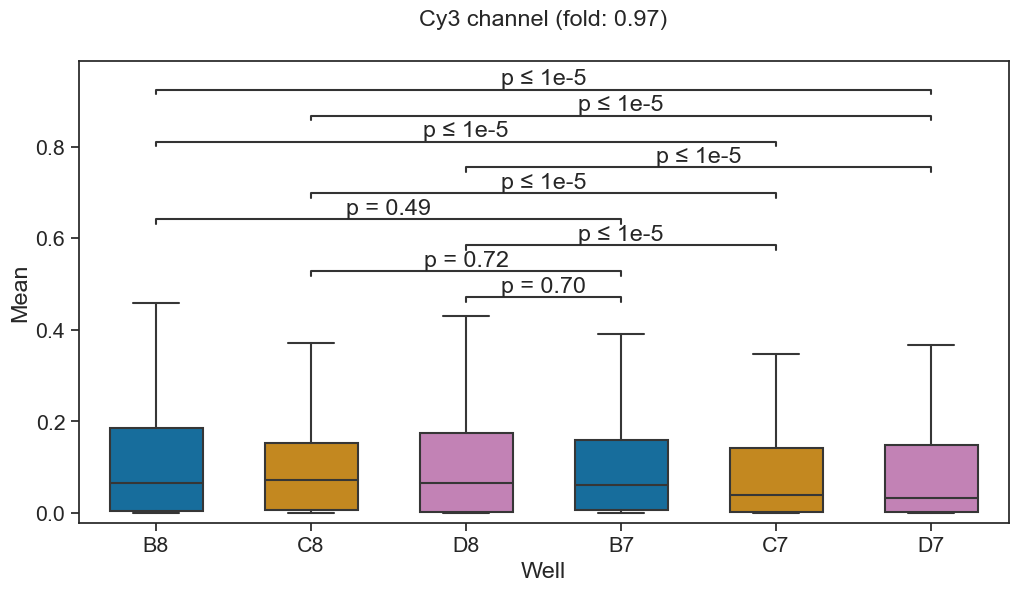

In [11]:
all_df = pd.DataFrame()
for s in range(4):
    well_set1 = pd.DataFrame()
    well_set2 = pd.DataFrame()
    print(s)
    if s == 0:
        set1 = ["B4", "C4", "D4"]  # kontrola
        set1_name = "CHOK1"
        set2 = ["B2", "C2", "D2"]
        set2_name = "CHOK1 Val30"
    if s == 1:
        set1 = ["B4", "C4", "D4"]  # kontrola
        set1_name = "CHOK1"
        set2 = ["B3", "C3", "D3"]
        set2_name = "CHOK1 Val15"
    if s == 2:
        set1 = ["B8", "C8", "D8"]  # kontrola
        set1_name = "HeLa"
        set2 = ["B6", "C6", "D6"]
        set2_name = "HeLa Val30"
    if s == 3:
        set1 = ["B8", "C8", "D8"]  # kontrola
        set1_name = "HeLa"
        set2 = ["B7", "C7", "D7"]
        set2_name = "HeLa Val15"

    well_set1, well_set2 = visSets(set1, set2, path)
    well_set1["Set"] = 1
    well_set1["Set_name"] = set1_name
    well_set1.Mean.describe()

    well_set2["Set"] = 2
    well_set2["Set_name"] = set2_name
    well_set2.Mean.describe()

    ## load all data to all_df
    if s == 0:
        all_df = pd.concat([well_set1, well_set2])
    if s == 1:
        all_df = pd.concat([all_df, well_set2])
    if s == 2:
        all_df = pd.concat([all_df, well_set1, well_set2])
    if s == 3:
        all_df = pd.concat([all_df, well_set2])

    print("Control")
    sns.set_theme(style="ticks")

    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(figsize=(7, 6))

    # Plot the orbital period with horizontal boxes
    sns.boxplot(
        x="Well",
        y="Mean",
        data=well_set1,
        width=0.6,
        palette="vlag",
        showfliers=False,
    )

    # Add in points to show each observation
    # sns.swarmplot(x="Well", y="Mean", data=B23,
    #              size=3, palette="vlag")

    # Tweak the visual presentation
    ax.xaxis.grid(True)
    ax.set(ylabel="Mean")
    sns.despine(trim=True, left=True)

    print("stats")
    well_set1, well_set2 = visSets(set1, set2, path)
    well_set1["Set"] = 1
    well_set1["Well"].describe()

    well_set2["Set"] = 2
    well_set2["Well"].describe()

    print("Mean Brigthnes")
    print("Set1")
    print(well_set1["Mean"].mean())
    print("Set2")
    print(well_set2["Mean"].mean())

    print("Mean Area")
    print("Set1")
    print(well_set1["Area"].mean())
    print("Set2")
    print(well_set2["Area"].mean())

    new_row = {
        "Set": set1_name,
        "Mean": well_set1["Mean"].mean(),
        "Mean_25": well_set1["Mean"].quantile(q=0.25),
        "Mean_75": well_set1["Mean"].quantile(q=0.75),
        "Median": well_set1["Mean"].median(),
        "Median_25": well_set1["Mean"].quantile(q=0.25),
        "Median_75": well_set1["Mean"].quantile(q=0.75),
        "Area": well_set1["Area"].mean(),
        "Area_25": well_set1["Area"].quantile(q=0.25),
        "Area_75": well_set1["Area"].quantile(q=0.75),
        "MoA": well_set1["Mean"].mean() / well_set1["Area"].mean(),
    }
    df = df.append(new_row, ignore_index=True)
    # new_row = {'Set':"".join(set2), 'Mean':well_set2["Mean"].mean(), 'Median':well_set2["Area"].median(), 'Area':well_set2["Area"].mean(), 'MoA': well_set2["Mean"].mean()/well_set2["Area"].mean()}
    new_row = {
        "Set": set2_name,
        "Mean": well_set2["Mean"].mean(),
        "Mean_25": well_set2["Mean"].quantile(q=0.25),
        "Mean_75": well_set2["Mean"].quantile(q=0.75),
        "Median": well_set2["Mean"].median(),
        "Median_25": well_set2["Mean"].quantile(q=0.25),
        "Median_75": well_set2["Mean"].quantile(q=0.75),
        "Area": well_set2["Area"].mean(),
        "Area_25": well_set2["Area"].quantile(q=0.25),
        "Area_75": well_set2["Area"].quantile(q=0.75),
        "MoA": well_set2["Mean"].mean() / well_set2["Area"].mean(),
    }
    df = df.append(new_row, ignore_index=True)

    print("--Mean/Area--")
    print("Set1")
    m2a1 = well_set1["Mean"].mean() / well_set1["Area"].mean()
    print(m2a1)
    print("Set2")
    m2a2 = well_set2["Mean"].mean() / well_set2["Area"].mean()
    print(m2a2)

    print("Fold: {}".format(m2a2 / m2a1))

    visStats(
        set1,
        set2,
        path,
        "Cy3 channel (fold: {:.2f})".format(m2a2 / m2a1),
        "vis4h_" + "".join(set1) + "".join(set2),
    )

In [12]:
df

,Set,Mean,Mean_25,Mean_75,Median,Median_25,Median_75,Area,Area_25,Area_75,MoA
0,CHOK1,1.641066,0.705050,2.225000,1.344415,0.705050,2.225000,0.052522,0.03168,0.057755,31.245087
1,CHOK1 Val30,2.179061,0.559105,2.431430,1.164965,0.559105,2.431430,0.035090,0.02062,0.041880,62.098366
2,CHOK1,1.641066,0.705050,2.225000,1.344415,0.705050,2.225000,0.052522,0.03168,0.057755,31.245087
3,CHOK1 Val15,2.151435,0.657905,2.096555,1.109090,0.657905,2.096555,0.039799,0.02507,0.045140,54.057195
4,HeLa,0.131678,0.003620,0.169625,0.067570,0.003620,0.169625,0.080106,0.05675,0.089630,1.643789
5,HeLa Val30,0.127338,0.002883,0.152100,0.044390,0.002883,0.152100,0.072845,0.05393,0.081270,1.748075
6,HeLa,0.131678,0.003620,0.169625,0.067570,0.003620,0.169625,0.080106,0.05675,0.089630,1.643789
7,HeLa Val15,0.119063,0.002360,0.149783,0.043660,0.002360,0.149783,0.074945,0.05501,0.083770,1.588682


## Results
The distributions of Mean Brightness from ROIs (MBR) do not have normal distribution (that can be partialy because the objects are close). So we should use MBR distribution median. In next table is MBR median, its Inter Quantile Range (IGR), and the same for MBR Mean

In [13]:
df["Mean_IQR"] = df["Mean_75"] - df["Mean_25"]
df["Median_IQR"] = df["Median_75"] - df["Median_25"]
df["Area_IQR"] = df["Area_75"] - df["Area_25"]
df["MDoa"] = df["Median"] / df["Area"]
df.rename(columns = {'Mean':'MFV'}, inplace = True)
df.rename(columns = {'Mean_IQR':'MFV_IQR'}, inplace = True)
df[
    [
        "Set",
        "MFV",
        "MFV_IQR",
        # "Median",
        # "Median_IQR",
        "Area",
        "Area_IQR",
        "MoA",
        # "MDoa",
    ]
]

,Set,MFV,MFV_IQR,Area,Area_IQR,MoA
0,CHOK1,1.641066,1.519950,0.052522,0.026075,31.245087
1,CHOK1 Val30,2.179061,1.872325,0.035090,0.021260,62.098366
2,CHOK1,1.641066,1.519950,0.052522,0.026075,31.245087
3,CHOK1 Val15,2.151435,1.438650,0.039799,0.020070,54.057195
4,HeLa,0.131678,0.166005,0.080106,0.032880,1.643789
5,HeLa Val30,0.127338,0.149218,0.072845,0.027340,1.748075
6,HeLa,0.131678,0.166005,0.080106,0.032880,1.643789
7,HeLa Val15,0.119063,0.147423,0.074945,0.028760,1.588682


In [14]:
print("Fold based on MBR mean:")
for i in range(0, len(df), 2):
    print(
        df.iloc[i + 1].Set
        + " over "
        + df.iloc[i].Set
        + ", \t fold: \t {}".format(df.iloc[i + 1].MoA / df.iloc[i].MoA)
    )

Fold based on MBR mean:
CHOK1 Val30 over CHOK1, 	 fold: 	 1.9874601785767771
CHOK1 Val15 over CHOK1, 	 fold: 	 1.7301022605429042
HeLa Val30 over HeLa, 	 fold: 	 1.0634422576001217
HeLa Val15 over HeLa, 	 fold: 	 0.966475324960104


In [15]:
print("Fold based on MBR median:")
for i in range(0, len(df), 2):
    print(
        df.iloc[i + 1].Set
        + " over "
        + df.iloc[i].Set
        + ", \t fold: \t {}".format(df.iloc[i + 1].MDoa / df.iloc[i].MDoa)
    )

Fold based on MBR median:
CHOK1 Val30 over CHOK1, 	 fold: 	 1.2969838591775091
CHOK1 Val15 over CHOK1, 	 fold: 	 1.0886866639347508
HeLa Val30 over HeLa, 	 fold: 	 0.722435747872896
HeLa Val15 over HeLa, 	 fold: 	 0.690644626845019


In [16]:
for i in range(0, len(df), 2):
    print(
        df.iloc[i + 1].Set
        + " over "
        + df.iloc[i].Set
        + ", \t area change: \t {:.2f} %".format(
            (df.iloc[i + 1].Area / df.iloc[i].Area) * 100
        )
    )

CHOK1 Val30 over CHOK1, 	 area change: 	 66.81 %
CHOK1 Val15 over CHOK1, 	 area change: 	 75.78 %
HeLa Val30 over HeLa, 	 area change: 	 90.94 %
HeLa Val15 over HeLa, 	 area change: 	 93.56 %


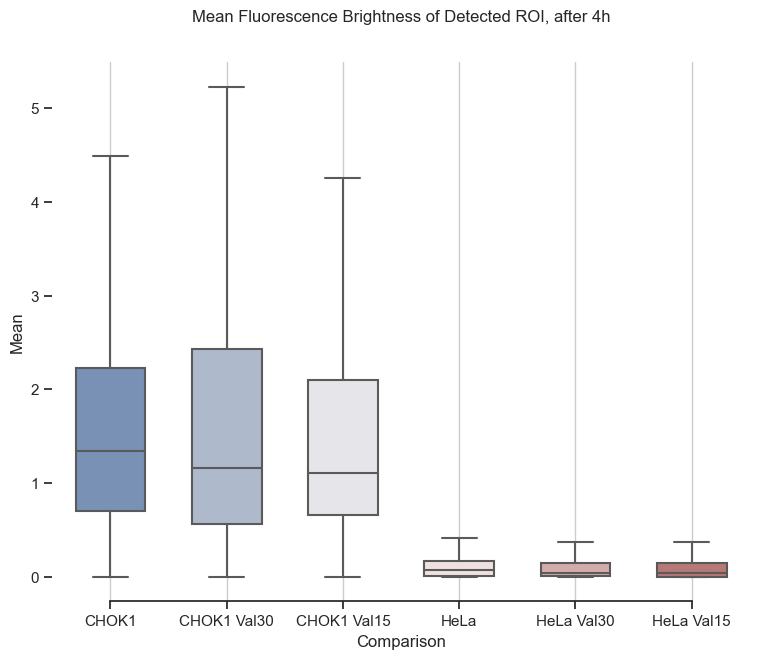

In [17]:
sns.set_theme(style="ticks")

# Initialize the figure
f, ax = plt.subplots(figsize=(9, 7))

# Plot 
sns.boxplot(
    x="Set_name",
    y="Mean",
    data=all_df,
    width=0.6,
    palette="vlag",
    showfliers=False,
)


# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Mean")
ax.set(xlabel="Comparison")
sns.despine(trim=True, left=True)
plt.title("Mean Fluorescence Brightness of Detected ROI, after 4h", y=1.06)

plt.savefig("./" + "All_wells_4h" + ".png", bbox_inches="tight")
plt.show()

Text(0.5, 1.06, 'Mean Fluorescence Brightness of Detected ROI, after 4h')

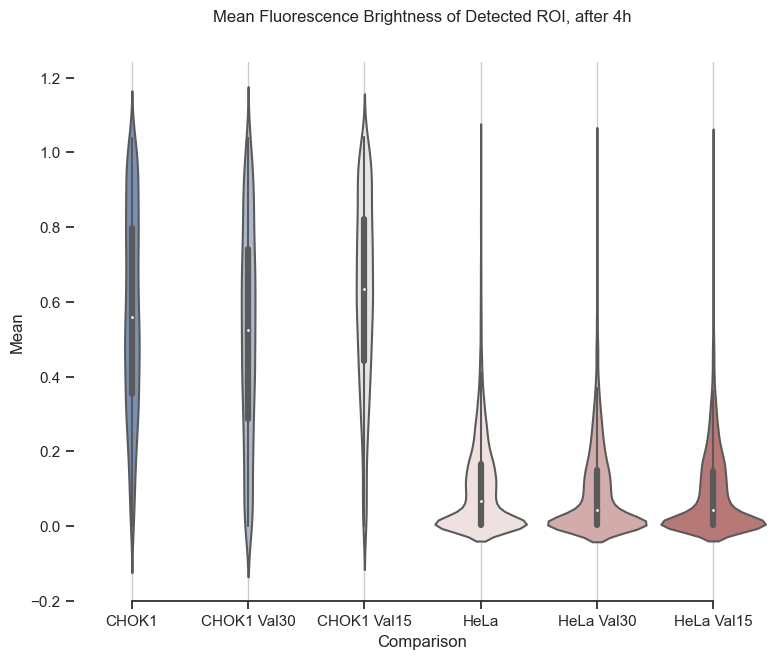

In [18]:
Q1 = all_df.Mean.quantile(0.25)
Q3 = all_df.Mean.quantile(0.75)
IQR = Q3 - Q1
cols = ["Mean"]
all_df = all_df[
    ~((all_df[cols] < (Q1 - 1.5 * IQR)) | (all_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
]

sns.set_theme(style="ticks")

# Initialize the figure
f, ax = plt.subplots(figsize=(9, 7))

sns.violinplot(
    x="Set_name",
    y="Mean",
    data=all_df,
    width=0.9,
    palette="vlag",
    showfliers=False,
)


# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Mean")
ax.set(xlabel="Comparison")
sns.despine(trim=True, left=True)
plt.title("Mean Fluorescence Brightness of Detected ROI, after 4h", y=1.06)

In [19]:
watermark(iversions=True, globals_=globals())
print(watermark())

Last updated: 2023-02-22T18:19:17.477525+01:00

Python implementation: CPython
Python version       : 3.9.16
IPython version      : 8.9.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [20]:
print(
    watermark(
        packages="watermark,numpy,pandas,seaborn,scipy,statannotations,statsmodels"
    )
)

watermark      : 2.3.1
numpy          : 1.24.1
pandas         : 1.5.3
seaborn        : 0.11.2
scipy          : 1.10.0
statannotations: 0.5.0
statsmodels    : 0.13.5

